In [1]:
import sys

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import torch

sys.path.append("..")

from kuramoto.plot import plot_image
from neural_rk.dataset import Dataset
from neural_rk.path import DATA_DIR

In [2]:
name = "A"
df_train = pd.read_pickle(DATA_DIR / f"kuramoto_{name}_train.pkl")
df_val = pd.read_pickle(DATA_DIR / f"kuramoto_{name}_val.pkl")
df_test = pd.read_pickle(DATA_DIR / f"kuramoto_{name}_test.pkl")

train_dataset = Dataset(df_train)
val_dataset = Dataset(df_val)
test_dataset = Dataset(df_test)

train_y = torch.cat([data.y.reshape(-1, 1) for data in train_dataset.data], dim=0).numpy()
val_y = torch.cat([data.y.reshape(-1, 1) for data in val_dataset.data], dim=0).numpy()
test_y = torch.cat([data.y.reshape(-1, 1) for data in test_dataset.data], dim=0).numpy()


# Statistics over dataset

In [3]:
print(f"{train_y.min():.1f} <= train <= {train_y.max():.1f}")
print(f"{val_y.min():.1f} <= val <= {val_y.max():.1f}")
print(f"{test_y.min():.1f} <= test <= {test_y.max():.1f}")


-5.0 <= train <= 5.4
-3.9 <= val <= 5.6
-5.2 <= test <= 5.0


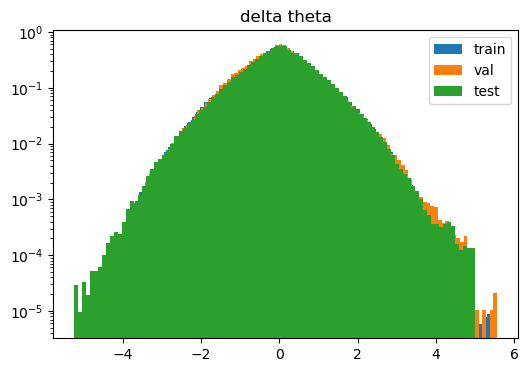

In [4]:
fig, ax = plt.subplots(figsize=(6, 4))

ax.set_title("delta theta")
ax.hist(train_y[..., 0], bins=100, label="train", density=True)
ax.hist(val_y[..., 0], bins=100, label="val", density=True)
ax.hist(test_y[..., 0], bins=100, label="test", density=True)
ax.legend()
ax.set_yscale("log")

fig.show()

# Plot trajectories one-by-one

In [ ]:
def plot_data(df: pd.DataFrame, idx: int) -> None:
    data = df.iloc[idx]
    fig, ax = plt.subplots(figsize=(8, 3))
    time = np.insert(np.cumsum(data.dts.numpy()), 0, 0.0)
    xticks = np.round(np.linspace(0.0, time[-1], 5), 2)
    phases = data.trajectories.numpy()

    plot_image(ax, phases, xticks=xticks)
    ax.set_title(f"idx: {idx}")

    fig.show()

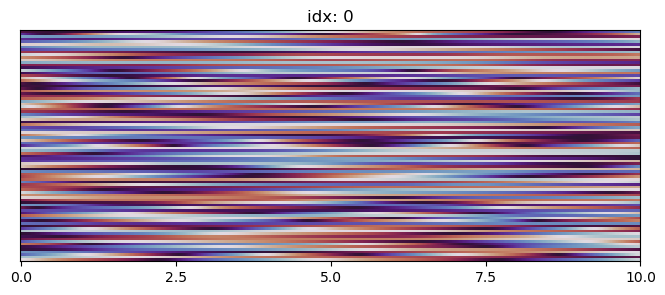

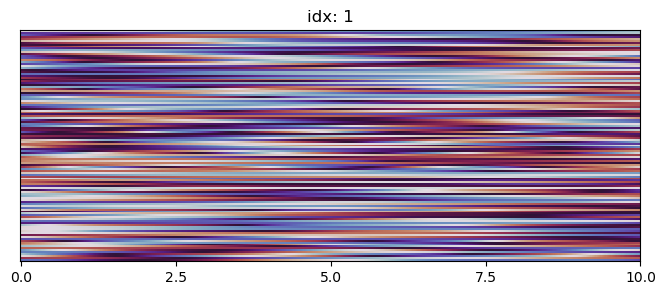

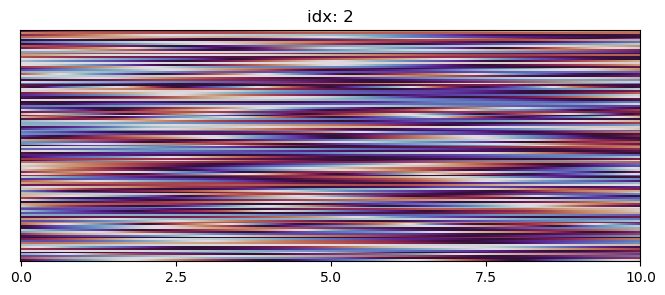

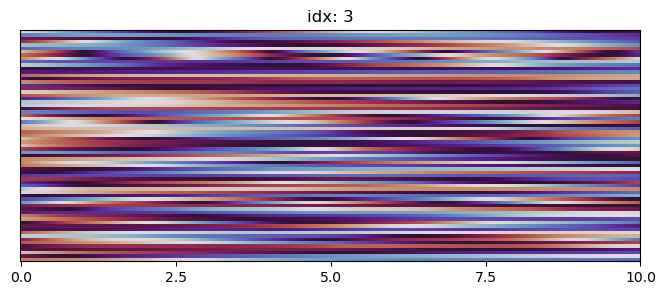

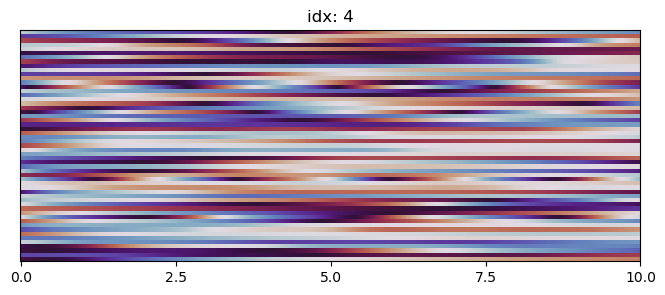

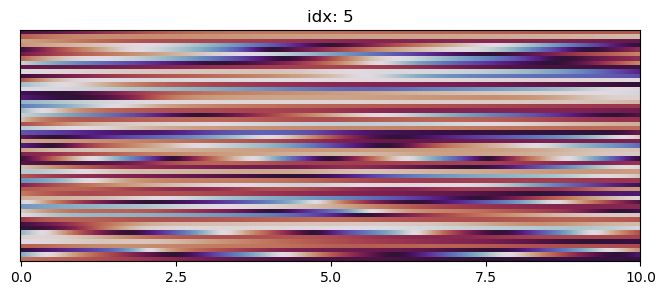

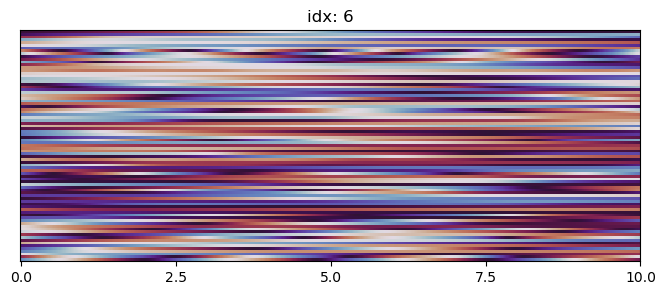

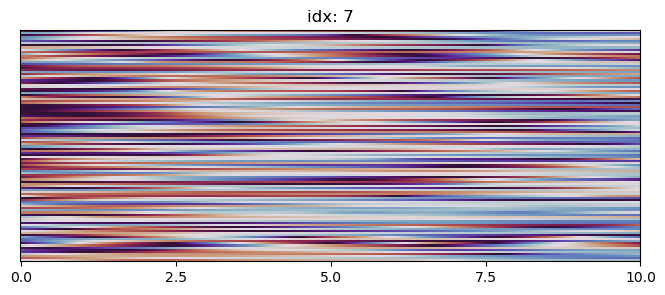

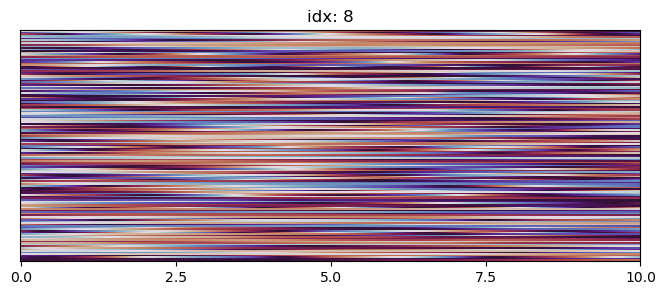

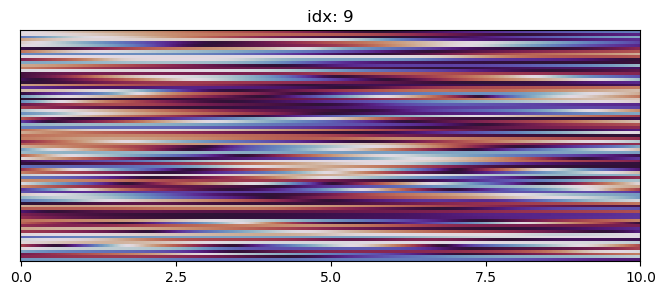

In [ ]:
plt.close("all")
for i in range(0, 10):
    plot_data(df_train, i)